In [95]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

In [118]:
# For all features combinations - 
X_train = pd.read_excel("X_train.xlsx")
y_train = pd.read_excel("y_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")
y_test = pd.read_excel("y_test.xlsx")

In [119]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())

In [120]:
y_pred1 = clf.predict(X_test)

In [121]:
print (accuracy_score(y_pred1, y_test))
print (f1_score(y_pred1, y_test))

0.7665315576143602
0.6713400717313335


In [122]:
metrics.confusion_matrix(y_test,y_pred1)

array([[4560,  819],
       [1197, 2059]])

In [89]:
model_tSNE = TSNE(n_components=2, random_state=0)
tsne_data = model_tSNE.fit_transform(X_train)

/home/dhruv/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'Logistic Regression Decision Boundary')

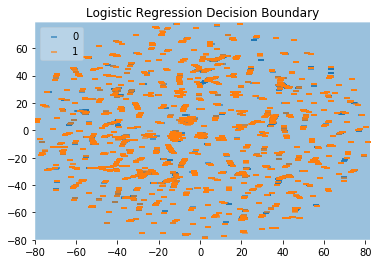

In [96]:
y_train=np.array(y_train).reshape(X_train.shape[0],)
plot_decision_regions(tsne_data, y_train, clf=LogisticRegression().fit(tsne_data,y_train), legend=2,markers='___')
plt.title("Logistic Regression Decision Boundary")

In [31]:
import glob 
from nltk import sent_tokenize
import nltk

def get_document_without_heading(fname, is_summ = False):
    file = open(fname,"r") 
    line = file.read()
    sent_text = nltk.sent_tokenize(line)
    for sent in sent_text:
        if(len(sent) == 1):
            sent_text.remove(sent)
    if is_summ is False:
        heading = sent_text.pop(0)
        heading = heading.split('\n\n')
        if len(heading) > 1:
            sent_text.insert(0,heading[1])
    return sent_text

In [32]:
test_labels = y_pred1.copy()
data_paths = []
for path in glob.glob("updated_data/Test_Data/*.txt"):
    data_paths.append(path)
data_paths.sort()
for i in range(len(data_paths)):
    summ = ''
    p = data_paths[i].split("/")[-1]
    summ_path = "Logistic_Predicted_Summ/" + p
    original_doc = get_document_without_heading(data_paths[i], is_summ = False )
    doc_labels = test_labels[:len(original_doc)]
    test_labels = test_labels[len(original_doc):]
    print(p)
    print(len(original_doc))
    print(len(doc_labels))
    print("left is : " + str(len(test_labels)) + "\n")
    
    for i in range(len(original_doc)):
        if doc_labels[i] == 1:
            summ = summ + original_doc[i] + " "
    summ = summ[:-1]
    f = open(summ_path,'w')
    f.write(summ)
    f.close()

1.txt
31
31
left is : 8604

10.txt
8
8
left is : 8596

100.txt
10
10
left is : 8586

101.txt
15
15
left is : 8571

102.txt
7
7
left is : 8564

103.txt
8
8
left is : 8556

104.txt
9
9
left is : 8547

105.txt
24
24
left is : 8523

106.txt
13
13
left is : 8510

107.txt
11
11
left is : 8499

108.txt
52
52
left is : 8447

109.txt
20
20
left is : 8427

11.txt
11
11
left is : 8416

110.txt
23
23
left is : 8393

111.txt
8
8
left is : 8385

112.txt
8
8
left is : 8377

113.txt
17
17
left is : 8360

114.txt
10
10
left is : 8350

115.txt
19
19
left is : 8331

116.txt
13
13
left is : 8318

117.txt
26
26
left is : 8292

118.txt
9
9
left is : 8283

119.txt
19
19
left is : 8264

12.txt
11
11
left is : 8253

120.txt
29
29
left is : 8224

121.txt
13
13
left is : 8211

122.txt
15
15
left is : 8196

123.txt
13
13
left is : 8183

124.txt
11
11
left is : 8172

125.txt
11
11
left is : 8161

126.txt
10
10
left is : 8151

127.txt
13
13
left is : 8138

128.txt
17
17
left is : 8121

129.txt
13
13
left is : 8108


398.txt
25
25
left is : 2540

399.txt
41
41
left is : 2499

4.txt
16
16
left is : 2483

40.txt
19
19
left is : 2464

400.txt
21
21
left is : 2443

401.txt
14
14
left is : 2429

402.txt
39
39
left is : 2390

403.txt
26
26
left is : 2364

404.txt
20
20
left is : 2344

405.txt
22
22
left is : 2322

406.txt
59
59
left is : 2263

407.txt
18
18
left is : 2245

408.txt
46
46
left is : 2199

409.txt
25
25
left is : 2174

41.txt
20
20
left is : 2154

410.txt
20
20
left is : 2134

411.txt
20
20
left is : 2114

412.txt
32
32
left is : 2082

413.txt
27
27
left is : 2055

414.txt
32
32
left is : 2023

415.txt
17
17
left is : 2006

416.txt
18
18
left is : 1988

417.txt
15
15
left is : 1973

418.txt
22
22
left is : 1951

419.txt
21
21
left is : 1930

42.txt
19
19
left is : 1911

420.txt
16
16
left is : 1895

421.txt
27
27
left is : 1868

422.txt
115
115
left is : 1753

423.txt
13
13
left is : 1740

424.txt
15
15
left is : 1725

425.txt
26
26
left is : 1699

426.txt
31
31
left is : 1668

427.txt
42
42

In [123]:
# Combination of Relevance and surface features
X_train = pd.read_excel("X_train.xlsx")
y_train = pd.read_excel("y_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")
y_test = pd.read_excel("y_test.xlsx")

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)

In [124]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred2 = clf.predict(X_test)
print (accuracy_score(y_pred2, y_test))
print (f1_score(y_pred2, y_test))

0.7631731325998842
0.662262592898431


In [117]:
metrics.confusion_matrix(y_test,y_pred2)

array([[4585,  794],
       [1251, 2005]])

In [126]:
# Combination of Surface and Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)

In [127]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred3 = clf.predict(X_test)
print (accuracy_score(y_pred3, y_test))
print (f1_score(y_pred3, y_test))

0.7169658367110596
0.5972313777191826


In [128]:
metrics.confusion_matrix(y_test,y_pred3)

array([[4379, 1000],
       [1444, 1812]])

In [129]:
# Combination of Relevance and Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [131]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred4 = clf.predict(X_test)
print (accuracy_score(y_pred4, y_test))
print (f1_score(y_pred4, y_test))

0.7664157498552403
0.6700474398822183


In [132]:
metrics.confusion_matrix(y_test,y_pred4)

array([[4570,  809],
       [1208, 2048]])

In [133]:
# Only Relevance features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [135]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred5 = clf.predict(X_test)
print (accuracy_score(y_pred5, y_test))
print (f1_score(y_pred5, y_test))

0.7577301679212507
0.6496985934360349


In [136]:
metrics.confusion_matrix(y_test,y_pred5)

array([[4603,  776],
       [1316, 1940]])

In [137]:
# Only Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

# X_train = X_train.drop(["FreqWord_Uni"], axis=1)
# X_train = X_train.drop(["FreqWord_Bi"], axis=1)
# X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
# X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
# X_train = X_train.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [138]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred6 = clf.predict(X_test)
print (accuracy_score(y_pred6, y_test))
print (f1_score(y_pred6, y_test))

0.7101331789229879
0.5853900944177571


In [82]:
metrics.confusion_matrix(y_test,y_pred6)

array([[4365, 1014],
       [1489, 1767]])

In [139]:
# Only Surface features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

# X_train = X_train.drop(["Length"], axis=1)
# X_train = X_train.drop(["Quote"], axis=1)
# X_train = X_train.drop(["Position"], axis=1)
# X_train = X_train.drop(["Para_First"], axis=1)
# X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)

In [140]:
clf = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred7 = clf.predict(X_test)
print (accuracy_score(y_pred7, y_test))
print (f1_score(y_pred7, y_test))

0.6493341053850608
0.30709382151029746


In [83]:
metrics.confusion_matrix(y_test,y_pred7)

array([[4936,  443],
       [2585,  671]])